In [3]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [4]:
x,y=make_regression(n_samples=100,n_features=2,random_state=1,noise=10)
model=LinearRegression()
model.fit(x,y)

y_pred=model.predict(x)
x,y
ridge_model=Ridge(alpha=1)
ridge_model.fit(x,y)
y_pr=ridge_model.predict(x)
lasso_model=Lasso(alpha=1)
lasso_model.fit(x,y)
lass_pred=lasso_model.predict(x)


100 100
mean squared error is 100.70654149779219
mean squared error is 101.84639670097621
mean squared error is 103.59206625700575


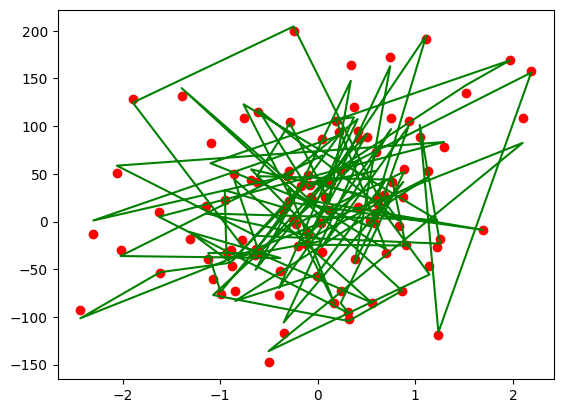

In [5]:
print(len(x),len(y))
print("mean squared error is",mean_squared_error(y,y_pred))
print("mean squared error is",mean_squared_error(y,y_pr))
print("mean squared error is",mean_squared_error(y,lass_pred))

plt.scatter(x[:,0],y,color="red")
plt.plot(x[:,0],y_pred,color="green")
plt.show()



In [6]:
x_new,y_new=make_regression(n_samples=50,n_features=10,random_state=1,noise=50)
x_new,y_new
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,random_state=42,test_size=1)

In [7]:
model=LinearRegression()
model.fit(x_train,y_train)
y_npred=model.predict(x_test)
ridge_nmodel=Ridge(alpha=0.0001)
lasso_nmodel=Lasso(alpha=0.0001)
ridge_nmodel.fit(x_train,y_train)
lasso_nmodel.fit(x_train,y_train)
r_pred=ridge_nmodel.predict(x_test)
l_pred=lasso_nmodel.predict(x_test)


In [8]:
print("mean squared error is ",mean_squared_error(y_test,y_npred))
print("ridge squared error is ",mean_squared_error(y_test,r_pred))
print("lasso squared error is ",mean_squared_error(y_test,l_pred))

mean squared error is  7679.134684412448
ridge squared error is  7679.229043953287
lasso squared error is  7679.20276069551


In [9]:
standard=StandardScaler()
x_train_scaled=standard.fit_transform(x_train)
x_test_scaled=standard.fit_transform(x_test)
model.fit(x_train_scaled,y_train)
y_pred_scaled=model.predict(x_test_scaled)
mse_scaled=mean_squared_error(y_test,y_pred_scaled)
print(mse_scaled)


22293.606502225288


In [11]:
elastic = ElasticNet()
elastic.fit(x_train_scaled,y_train)
elastic_pred=elastic.predict(x_test_scaled)
print(mean_squared_error(y_test,elastic_pred))

22293.606502225288


In [ ]:
score= cross_val_score(model,x,y,cv=5)
np.mean(score)

np.float64(0.9712112750224131)